# Лабораторная работа №3

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('JobSurveyIndia.csv')
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [4]:
data.dtypes

Unnamed: 0                 int64
Employment Sector         object
Employment Background     object
Public Dealing            object
Degree                    object
IdealNumberOfWorkdays    float64
IdealYearlyIncome         object
dtype: object

In [5]:
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data['IdealYearlyIncome'].nunique()

4

<Axes: >

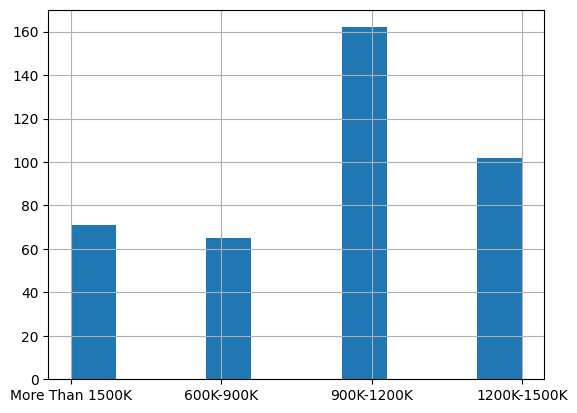

In [8]:
data['IdealYearlyIncome'].hist()

# 2. Задача регрессии

Задача регрессии была выбрана, т.к. в любом случае будет возвращаться значение зависимой переменной IdealYearlyIncome от независимых переменных

# 3. Предобратока данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Создаются функции для замены категориальных значений в наборе данных, таких как Keys и Mode, на числовые значения. Keys преобразуются в соответствующие им частоты фортепианных клавиш, а Mode преобразуется с помощью метода One-Hot-Encoding (т. е. мажор = 1, минор = 0).

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

In [9]:
data.isnull().sum()

Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

В нашем случае пропусков не обнаружено

In [10]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     Employment Sector  Employment Background  Public Dealing  Degree  \
0                    2                      3               0       1   
1                    2                      1               1       2   
2                    1                      3               0       1   
3                    1                      2               2       2   
4                    2                      3               0       1   
..                 ...                    ...             ...     ...   
395                  2                      2               1       2   
396                  1                      2               2       0   
397                  1                      2               2       0   
398                  1                      2               0       0   
399                  0                      2               2       0   

     IdealNumberOfWorkdays  IdealYearlyIncome  
0                      4.0                  3  
1                      4.0 

In [11]:
data['IdealNumberOfWorkdays'] = data['IdealNumberOfWorkdays'].astype('int32')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Employment Sector      400 non-null    int32
 1   Employment Background  400 non-null    int32
 2   Public Dealing         400 non-null    int32
 3   Degree                 400 non-null    int32
 4   IdealNumberOfWorkdays  400 non-null    int32
 5   IdealYearlyIncome      400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [13]:
data.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,2,3,0,1,4,3
1,2,1,1,2,4,1
2,1,3,0,1,6,2
3,1,2,2,2,4,2
4,2,3,0,1,5,0


### C. Нормирование численных переменных датасета

In [14]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['IdealYearlyIncome', 'IdealNumberOfWorkdays']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,IdealYearlyIncome,IdealNumberOfWorkdays
0,1.000000,0.000000
1,0.333333,0.000000
2,0.666667,0.666667
3,0.666667,0.000000
4,0.000000,0.333333


### A. Разделение выборки на тестовую и тренировочную 

In [15]:
data.describe()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,1.147500,2.010000,1.100000,0.85250,0.300833,0.501667
std,0.712047,0.906617,0.931219,0.79203,0.268663,0.352415
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.00000,0.333333,0.666667
75%,2.000000,3.000000,2.000000,1.25000,0.333333,0.666667
max,2.000000,3.000000,2.000000,2.00000,1.000000,1.000000


In [16]:
X = data.drop(columns=['IdealYearlyIncome'])
y = data['IdealYearlyIncome']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Обучение на тренировочном множестве

### А. Линейная модель

In [18]:
from sklearn.linear_model import LinearRegression

# Создаем сущность линейной модели
linear_model = LinearRegression()

# Train the model on the training dataset
linear_model.fit(X_train, y_train)

LinearRegression()

### B. Деревянная модель

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Создаем список для сохранения значений MSE для каждой глубины дерева
mse_scores = []

# Задаем список глубин деревьев, которые хотим проверить
depths = [3, 5, 7, 10]

# Обучаем модель для каждой глубины дерева и вычисляем MSE
for depth in depths:
    # Создаем экземпляр модели с заданной глубиной дерева
    tree_model = DecisionTreeRegressor(max_depth=depth)
    
    # Обучаем модель на тренировочной выборке
    tree_model.fit(X_train, y_train)
    
    # Предсказываем значения на тестовой выборке
    y_pred = tree_model.predict(X_test)
    
    # Вычисляем MSE и сохраняем его в список
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Выводим значения MSE для каждой глубины дерева
for depth, mse in zip(depths, mse_scores):
    print(f"Глубина: {depth}, MSE: {mse}")

Глубина: 3, MSE: 0.05013104387988806
Глубина: 5, MSE: 0.04290659950308649
Глубина: 7, MSE: 0.03035757294274948
Глубина: 10, MSE: 0.033135350720527264


### C. K-ближайших соседей

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 5
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 7
knn_7 = KNeighborsRegressor(n_neighbors=7)
knn_7.fit(X_train, y_train)

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 10
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_10.fit(X_train, y_train)

import matplotlib.pyplot as plt

# Список для сохранения значений MSE для каждой глубины
mse_scores = []

# Список глубин
depths = [3, 5, 7, 10]

# Перебираем каждую глубину
for depth in depths:
    # Создаем экземпляр модели DecisionTreeRegressor с текущей глубиной
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train, y_train)
    
    # Предсказываем значения для тестовой выборки
    y_pred = tree_model.predict(X_test)
    
    # Вычисляем среднеквадратичную ошибку (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Добавляем значение MSE в список
    mse_scores.append(mse)

# Находим индекс минимального значения MSE
best_depth_index = mse_scores.index(min(mse_scores))

# Выводим наилучшую глубину
best_depth = depths[best_depth_index]
print(f"Лучшая глубина - {best_depth}")


Лучшая глубина - 10


### D. Случайный лес

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# 5. Подсчет метрик на train и test множествах (Задача регрессии)

In [22]:
# Импортируем необходимые модули
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Модель KNeighborsRegressor с n_neighbors=3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)
mae_knn_3 = mean_absolute_error(y_test, y_pred_knn_3)
mse_knn_3 = mean_squared_error(y_test, y_pred_knn_3)
rmse_knn_3 = np.sqrt(mse_knn_3)

# Выводим результаты
print("KNeighborsRegressor (n_neighbors=3):")
print("MAE:", mae_knn_3)
print("MSE:", mse_knn_3)
print("RMSE:", rmse_knn_3)
print()

# Модель LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Выводим результаты
print("LinearRegression:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print()

# Модель RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Выводим результаты
print("RandomForestRegressor:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print()

# Модель DecisionTreeRegressor с max_depth=10
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# Выводим результаты
print("DecisionTreeRegressor (максимальная глубина=3):")
print("MAE:", mae_tree)
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)

KNeighborsRegressor (n_neighbors=3):
MAE: 0.125
MSE: 0.04753086419753087
RMSE: 0.21801574300387316

LinearRegression:
MAE: 0.24541295791691375
MSE: 0.09078411931325006
RMSE: 0.30130403135910755

RandomForestRegressor:
MAE: 0.11243051802172269
MSE: 0.03177301025678368
RMSE: 0.17824985345515346

DecisionTreeRegressor (максимальная глубина=3):
MAE: 0.17234853282512405
MSE: 0.05013104387988807
RMSE: 0.22389962903026006


# 6. Сравнение метрик

In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создание списка моделей и их метрик
models = [linear_model, knn_3, tree_model, rf_model]
model_names = ['Linear Regression', 'KNN (k=3)', 'Decision Tree', 'Random Forest']
mae_train = []
mae_test = []
mse_train = []
mse_test = []

# Вычисление метрик для каждой модели
for model in models:
    # Предсказание на тренировочных данных
    y_train_pred = model.predict(X_train)
    # Предсказание на тестовых данных
    y_test_pred = model.predict(X_test)
    # Вычисление MAE для тренировочных и тестовых данных
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))
    # Вычисление MSE для тренировочных и тестовых данных
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Вывод результатов
for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"MAE (Train): {mae_train[i]}")
    print(f"MAE (Test): {mae_test[i]}")
    print(f"MSE (Train): {mse_train[i]}")
    print(f"MSE (Test): {mse_test[i]}")
    print()

# Оценка наличия переобучения и недообучения
best_model_index = np.argmin(mae_test)
worst_model_index = np.argmax(mae_test)

print(f"Лучшая модель: {model_names[best_model_index]}")
print(f"Худшая модель: {model_names[worst_model_index]}")


Model: Linear Regression
MAE (Train): 0.2485156284758639
MAE (Test): 0.24541295791691375
MSE (Train): 0.09458128023314759
MSE (Test): 0.09078411931325006

Model: KNN (k=3)
MAE (Train): 0.11458333333333333
MAE (Test): 0.125
MSE (Train): 0.048225308641975315
MSE (Test): 0.04753086419753087

Model: Decision Tree
MAE (Train): 0.1918685939723272
MAE (Test): 0.17234853282512405
MSE (Train): 0.06193552582781468
MSE (Test): 0.05013104387988807

Model: Random Forest
MAE (Train): 0.10822075077185192
MAE (Test): 0.11243051802172269
MSE (Train): 0.03469117000696624
MSE (Test): 0.03177301025678368

Лучшая модель: Random Forest
Худшая модель: Linear Regression


In [24]:
# Ответы на вопросы
print(f"1. Лучшая модель: {model_names[best_model_index]}")
print(f"2. Переобучение: {mae_train[best_model_index] < 0.1}")
print(f"3. Недообучение: {abs(mae_train[best_model_index] - mae_test[best_model_index]) > 0.05}")
print(f"4. Для улучшения метрик моделей можно попробовать следующие подходы:")
print("   - Подбор оптимальных гиперпараметров моделей")
print("   - Использование более сложных моделей или ансамблей моделей")
print("   - Увеличение размера обучающей выборки")
print("   - Использование дополнительных признаков или преобразование существующих признаков")

1. Лучшая модель: Random Forest
2. Переобучение: False
3. Недообучение: False
4. Для улучшения метрик моделей можно попробовать следующие подходы:
   - Подбор оптимальных гиперпараметров моделей
   - Использование более сложных моделей или ансамблей моделей
   - Увеличение размера обучающей выборки
   - Использование дополнительных признаков или преобразование существующих признаков


В данном случае была выбрана модель Random Forest как самая оптимальная, так же модель обучилась корректно и переобучения или недообучения не наблюдается.